## Assignment 2 Question 1

Import the libraries required

In [2]:
import sklearn # import sklearn for building the classifier
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # import matplotlib since I am going to build some plots 
import pandas as pd

Set the data file name to be a constant

In [3]:
DATAFILE = "iris.csv"

Read the data from the file

In [4]:
file = open(DATAFILE, 'r')
raw_data = [line.split(',') for line in file]
data = [line[:-1] for line in raw_data]
results = [line[-1] for line in raw_data]
file.close()

Preprocess the data (convert it into numbers so that the classifier would understand it)

In [5]:
le = preprocessing.LabelEncoder()

features_list = [le.fit_transform([data[row][col] for row in range(len(data))]) for col in range(len(data[0]))]
united_features = list(zip(*features_list))
label = le.fit_transform(results)

Calculate accuracy for each feature alone

In [6]:
accuracies = [] # Create a list of accuracies so that we could build the plots based on it later.
for feature_index, feature in enumerate(features_list):
	gnbc = GaussianNB() # gnbc stands for gaussian naive bayes classifer
	feature = feature.reshape(-1, 1)
	X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.33) # split train and test data
	# print(*feature, sep='\n')
	gnbc.fit(X_train, y_train)
	correct_cases = 0
	for i in range(len(X_test)):
		res = gnbc.predict([X_test[i]])[0]
		if (res == y_test[i]): # if result is correct
			correct_cases += 1
	accuracies.append(correct_cases/len(X_test))
	print("Accuracy for feature #" + str(feature_index + 1) + ":", accuracies[feature_index])


Accuracy for feature #1: 0.66
Accuracy for feature #2: 0.48
Accuracy for feature #3: 0.9
Accuracy for feature #4: 0.94


Calculate accuracy for all features

In [12]:
X_train, X_test, y_train, y_test = train_test_split(united_features, label, test_size=0.33) # split train and test data
gnbc.fit(X_train, y_train)
correct_cases = 0
for i in range(len(X_test)):
    res = gnbc.predict([X_test[i]])[0]
    if (res == y_test[i]): # if result is correct
        correct_cases += 1
accuracies.append(correct_cases/len(X_test))
print("Accuracy for all features:", correct_cases/len(X_test))

Accuracy for all features: 0.94


As we can see, the accuracy of the 4-feature classifier is lower than the accuracy of 1-feature classifier for features 3 and 4. 

Build the plot, representing the accuracy of each 1-feature classifier, compared to 4-feature classifier.

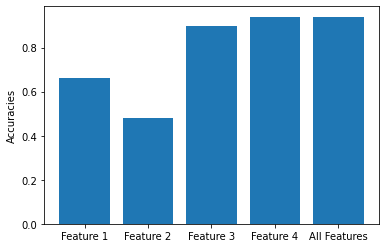

In [8]:
x = range(len(accuracies))
plt.bar(x, height=accuracies)
plt.xticks(x, ["Feature " + str(i + 1) for i in range(len(features_list))] + ["All Features"])
plt.ylabel('Accuracies')
plt.show()


On this plot we can see the accuracies for each feature and for all features on y-axis and Features on the x-axis

Build the density plots for each feature

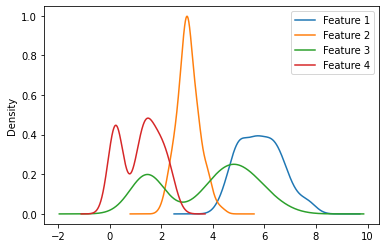

In [9]:
df = pd.read_csv(DATAFILE, header=None)
df.columns = ['Feature ' + str(i + 1) for i in range(len(df.columns))]
df.plot.density()
plt.show()

Here we can see that feature 2, which has the lowest density, actually has the highest density. That might be caused by the circumstance that it has the lowest range of all features. Feature 3 has the lowest density, lowest range and highest accuracy. Hence I can supose that the lower is the density of a feature and the higher is its range, the higher is its accuracy.

In [10]:
for index, feature in enumerate(features_list):
    print("Range of feature " + str(index+1) + ":", len(set(feature)))

Range of feature 1: 35
Range of feature 2: 23
Range of feature 3: 43
Range of feature 4: 22
